Import required libraries.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import  Input, BatchNormalization, Conv2D
from tensorflow.keras.layers import Dense, MaxPool2D, GlobalAvgPool2D

We are importing dataset from tensorflow command as mnist is already integrated in tensorflow we do not have to download it seperately.

In [2]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print("x_train.shape = ", x_train.shape)
print("y_train.shape = ", y_train.shape)
print("x_test.shape = ", x_test.shape)
print("y_test.shape = ", y_test.shape)

x_train.shape =  (60000, 28, 28)
y_train.shape =  (60000,)
x_test.shape =  (10000, 28, 28)
y_test.shape =  (10000,)


Printing a small part of the MNIST dataset.

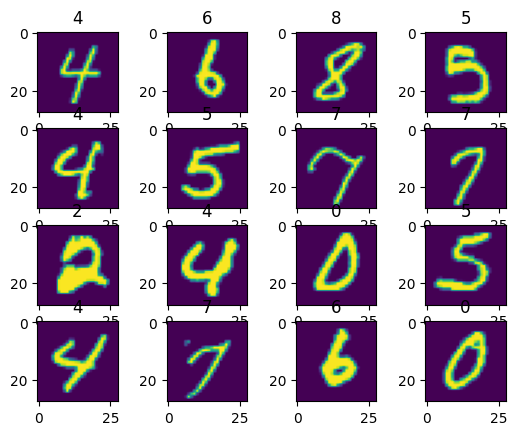

In [3]:
plt.figure()

for i in range(16):
    
    index = np.random.randint(0, x_train.shape[0] - 1)
    plt.subplot(4,4, i+1)
    plt.title(str(y_train[index]))
    plt.imshow(x_train[index])

plt.show()

Using CNN Algorithm

In [4]:
# tensorflow.keras.Sequential
model = tf.keras.Sequential(
    [
        # Experiment on these layers to see how diffrently it trains and what 
        #model is better
        
        Input(shape=(28, 28, 1)),                                                # this is actualy 4D. 1 layer of no. of batches is hidden
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        Conv2D(64, (3,3), activation='relu'),
        MaxPool2D(),
        BatchNormalization(),

        GlobalAvgPool2D(),
        Dense(64, activation='relu'),
        Dense(32, activation='softmax')
    ]
)

In [5]:
x_train = x_train.astype('float') / 255                                          #0 and 255 are corresponting to black and white respectively
x_test = x_test.astype('float') / 255

x_train = np.expand_dims(x_train, axis=-1)                                       #adding another dimension at the end to make it work with Conv2D which expects a 4D tensor
x_test = np.expand_dims(x_test, axis=-1)

Choosing optimizer

In [6]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')            #refer classes of optimezer and other things

Model Training with 3 epochs and 50 batch size

In [7]:
# Model training
model.fit(x_train, y_train, batch_size=50, epochs=3, validation_split=0.2)    

Epoch 1/3
960/960 [==============================] - 200s 192ms/step - loss: 0.3986 - accuracy: 0.9140 - val_loss: 0.1354 - val_accuracy: 0.9659
Epoch 2/3
960/960 [==============================] - 188s 195ms/step - loss: 0.1110 - accuracy: 0.9693 - val_loss: 0.0861 - val_accuracy: 0.9753
Epoch 3/3
960/960 [==============================] - 159s 166ms/step - loss: 0.0790 - accuracy: 0.9782 - val_loss: 0.0688 - val_accuracy: 0.9793


Evaluation on test set

In [8]:
model.evaluate(x_test, y_test, batch_size=50)

200/200 [==============================] - 10s 51ms/step - loss: 0.0725 - accuracy: 0.9792


[0.07251384109258652, 0.979200005531311]